## 作业5：使用蚁群算法解决TSP问题
2112105068 韦青茂

30个城市的TSP问题Oliver30数据：

In [1]:
import numpy as np
from matplotlib import pyplot as plt

tsp30 = np.array([[87, 7], [91, 38], [83, 46], [71, 44], [64, 60], [
    68, 58], [83, 69], [87, 76], [74, 78], [71, 71], [
    58, 69], [54, 62], [51, 67], [37, 84], [41, 94], [
    2, 99], [7, 64], [22, 60], [25, 62], [18, 54], [
    4, 50], [13, 40], [18, 40], [24, 42], [25, 38], [
    41, 26], [45, 21], [44, 35], [58, 35], [62, 32]])

plt.rcParams['font.family'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False




计算好各个城市间的距离矩阵，以及对距离取倒数的$\eta$矩阵

In [ ]:
distance = np.zeros([30,30])
for x in range(30):
    for y in range(30):
        d = np.sqrt(np.square(tsp30[x,0]-tsp30[y,0]) +
            np.square(tsp30[x,1]-tsp30[y,1]))
        if x==y:
            d = 1
        distance[x,y] = d

eta = 1/distance
row, col = np.diag_indices_from(eta)
eta[row,col] = 0

蚂蚁类的定义

In [25]:
class _Ant(object):
    def __init__(self, start = -1):
        self.total_cost = 0
        self.pheromone_delta = []  # 信息素的增量
        if start == -1:
            self.start = np.random.randint(0, NUM_CITY)  # 随机选择初始城市
        else:
            self.start = start
        self.allowed = np.ones(NUM_CITY)
        self.allowed[self.start] = 0
        self.current = self.start
        self.trail = [self.start]
        self.pheromone_powered = np.power(pheromone, ALPHA)

    # 根据概率选择下一个要去的城市
    def _select_next(self):
        # 计算各个可行城市的概率
        pheromone_allowed = self.pheromone_powered[self.current] * self.allowed
        eta_allowed = eta_powered[self.current] * self.allowed
        probabilities = pheromone_allowed * eta_allowed / np.sum(pheromone_allowed * eta_allowed)

        selected = np.random.choice(30,p=probabilities)
        self.trail.append(selected)
        self.allowed[selected] = 0
        self.total_cost += distance[self.current][selected]
        self.current = selected
        return selected

    # 计算路径上信息素增量
    def _update_pheromone_delta(self):
        self.pheromone_delta = np.zeros([NUM_CITY, NUM_CITY])
        for _ in range(1, len(self.trail)):
            i = self.trail[_ - 1]
            j = self.trail[_]
            if UPDATE_STRATEGY == 1:  # ant-quality system
                self.pheromone_delta[i][j] = Q
                self.pheromone_delta[j][i] = Q
            elif UPDATE_STRATEGY == 2:  # ant-density system
                self.pheromone_delta[i][j] = Q / distance[i][j]
                self.pheromone_delta[j][i] = Q / distance[i][j]
            else:  # ant-cycle system
                self.pheromone_delta[i][j] = Q / self.total_cost
                self.pheromone_delta[j][i] = Q / self.total_cost

Test 0, gen #199, best cost: 428.5027902555474, path: [29, 28, 26, 25, 27, 23, 24, 22, 21, 20, 19, 17, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
Test 1, gen #199, best cost: 426.7777445790508, path: [4, 5, 3, 2, 1, 0, 29, 28, 27, 25, 26, 24, 23, 22, 21, 20, 19, 17, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
Test 2, gen #199, best cost: 426.7777445790508, path: [4, 5, 3, 2, 1, 0, 29, 28, 27, 25, 26, 24, 23, 22, 21, 20, 19, 17, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
Test 3, gen #199, best cost: 426.7777445790508, path: [4, 5, 3, 2, 1, 0, 29, 28, 27, 25, 26, 24, 23, 22, 21, 20, 19, 17, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
Test 4, gen #199, best cost: 426.7777445790508, path: [4, 5, 3, 2, 1, 0, 29, 28, 27, 25, 26, 24, 23, 22, 21, 20, 19, 17, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
Test 5, gen #199, best cost: 426.7777445790508, path: [4, 5, 3, 2, 1, 0, 29, 28, 27, 25, 26, 24, 23, 22, 21, 20, 19, 17, 18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6]
Test 6, ge

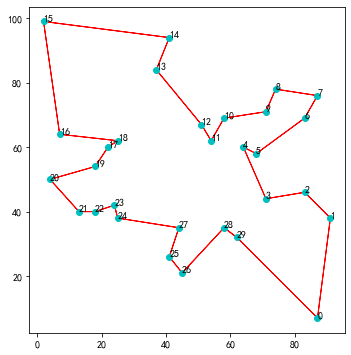

In [34]:
NUM_ANT = 31  # 蚂蚁个数​
NUM_CITY = 30  # 30个城市​
ALPHA = 1  # 信息素重要程度因子​
BETA = 5   # 启发函数重要程度因子​
RHO = 0.5  # 信息素的挥发速度​
Q = 100     # 信息量​
UPDATE_STRATEGY = 0
ITER_MAX = 200     #迭代总数​
best_cost = float('inf')
best_solution = []
minY = []

for test in range(50):
    pheromone = np.ones([NUM_CITY,NUM_CITY])*0.0001
    eta_powered = np.power(eta,BETA)
    for gen in range(ITER_MAX):
        global GEN
        GEN = gen
        ants = [_Ant() for i in range(NUM_ANT)]
        for _,ant in enumerate(ants):
            for i in range(NUM_CITY-1):
                end = ant._select_next()
            ant.total_cost += distance[end][ant.start]
            if ant.total_cost < best_cost:
                best_cost = ant.total_cost
                best_solution = [] + ant.trail
            # update pheromone
            ant._update_pheromone_delta()
        pheromone = pheromone * RHO
        for ant in ants:    
            pheromone = pheromone + ant.pheromone_delta
        minY.append(best_cost)
print('Test {}, gen #{}, best cost: {}, path: {}'.format(test, gen, best_cost, best_solution))
plotTrail(best_solution,tsp30)

In [ ]:
def plotTrail(path,points):

    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'co')
    for i in range(len(x)):
        plt.annotate(i, xy=(x[i], y[i]),
                    xytext=(x[i] + 0.001, y[i] + 0.001)) 

    for _ in range(1, len(path)):
        i = path[_ - 1]
        j = path[_]
        plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)
    i = path[-1]
    j = path[0]
    plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)
    plt.xlim(0, max(x) * 1.1)
    plt.ylim(0, max(y) * 1.1)
    plt.axis('scaled')
    plt.show()

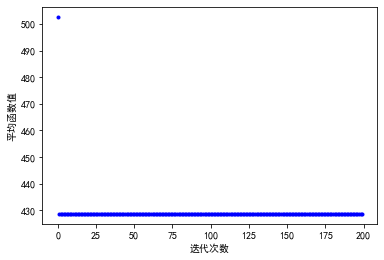

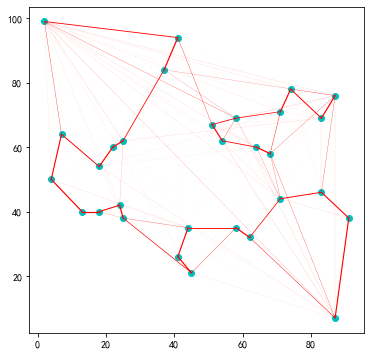

In [38]:
idx = np.arange(ITER_MAX)
figure = plt.plot(idx, minY[:ITER_MAX], '.', color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均函数值")
plt.title("")
plt.show()
plotTrails()

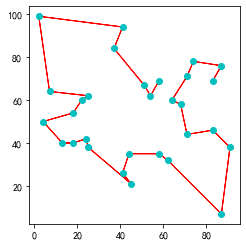

In [92]:
path = best_solution
points = tsp30
x = []
y = []
for point in points:
    x.append(point[0])
    y.append(point[1])
import operator
# y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
plt.plot(x, y, 'co')

for _ in range(1, len(path)):
    i = path[_ - 1]
    j = path[_]
    plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)
plt.xlim(0, max(x) * 1.1)
plt.ylim(0, max(y) * 1.1)
plt.axis('scaled')
plt.show() 

In [4]:
def plotTrails(ax=0):
    points = tsp30
    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, 'co')

    for start in range(NUM_CITY):
        for end in range(start, NUM_CITY):
            i = start
            j = end
            # plt.plot(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', width=pheromone[start, end])
            plt.plot([x[i], x[j]], [y[i],y[j]],color='r',linewidth=pheromone[start, end]/10)
    # ax.xlim(0, max(x) * 1.1)
    # ax.ylim(0, max(y) * 1.1)
    # ax.axis('scaled')
    # plt.show() 

单步执行

In [5]:
best_cost = float('inf')
best_solution = []
# Iteration
minY = []
pheromone = np.ones([NUM_CITY,NUM_CITY])*0.000000001

In [55]:
def execute():
    global best_cost, pheromone, best_solution
    ants = [_Ant() for i in range(NUM_ANT)]
    
    for _,ant in enumerate(ants):
        for i in range(NUM_CITY-1):
            end = ant._select_next()
        ant.total_cost += distance[end][ant.start]
        if ant.total_cost < best_cost:
            best_cost = ant.total_cost
            best_solution = [] + ant.trail
        # update pheromone
        ant._update_pheromone_delta()
    pheromone = pheromone * 0.5
    for ant in ants:    
        pheromone = pheromone + ant.pheromone_delta
    # minY.append(best_cost)
    # np.set_printoptions(precision=3)
    # np.set_printoptions(suppress=True)
    # print(pheromone)
    # plotTrails()

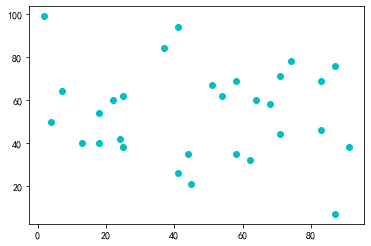

In [56]:
from matplotlib.animation import FuncAnimation
NUM_ANT = 31  # 蚂蚁个数​
NUM_CITY = 30  # 30个城市​
ALPHA = 1  # 信息素重要程度因子​
BETA = 5   # 启发函数重要程度因子​
RHO = 0.5  # 信息素的挥发速度​
Q = 100     # 信息量​
UPDATE_STRATEGY = 0
ITER_MAX = 200     #迭代总数​
best_cost = float('inf')
best_solution = []
# Iteration
minY = []
pheromone = np.ones([NUM_CITY,NUM_CITY])*0.000000001


fig = plt.figure()
ax = fig.subplots()
points = tsp30
x = []
y = []
for point in points:
    x.append(point[0])
    y.append(point[1])
# y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
# fig.figure(figsize=(6, 6))
ax.plot(x, y, 'co')
lines = []
for j in range(NUM_CITY):
    for i in range(j, NUM_CITY):
        lines.append(ax.plot([x[i], x[j]], [y[i],y[j]],color='r',linewidth=pheromone[j, i]))

pheromone = np.ones([NUM_CITY,NUM_CITY])*0.000000001
best_cost = float('inf')
best_solution = []
minY = []


def update(i):  #帧更新函数
    # print(i)
    global best_solution
    ax.set_title('Frame = %d'%(i))
    execute()
    path = best_solution
    k = 0
    for j in range(NUM_CITY):
        for i in range(j, NUM_CITY):
            lines[k][0].set_lw(pheromone[j, i]/6)
            k +=1
            # lines.append(plt.plot([x[i], x[j]], [y[i],y[j]],color='r',linewidth=pheromone[j, i]/10))



ani=FuncAnimation(fig=fig,func=update,frames=np.arange(0, 200),interval=100) #绘制动画
plt.show()
ani.save('a.gif')
# print('generation #{}, best cost: {}, path: {}'.format(gen, best_cost, best_solution))
# path = best_solution



